# Binary Image Segmentation

In [1]:
import cv2
from IPython.display import Image
import numpy as np
from math import sqrt, atan2, sin, cos
from time import sleep

from matplotlib import pyplot as plt


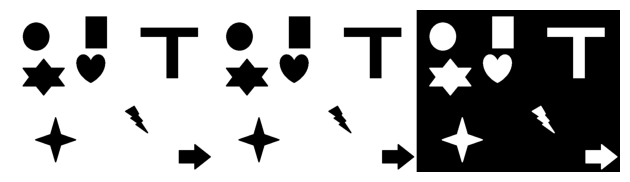

In [13]:
file = 'C:/Users/gerag/Desktop/Coursera/Fisrt Principles of Computer Vision/Camera and Imaging/SegmentingBinaryImages/img4.png'
img = cv2.cvtColor(cv2.imread(file),cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

img_blackandwhite = cv2.bitwise_not(cv2.threshold(img_gray, 235, 255, cv2.THRESH_BINARY)[1]) #Invert color
img_bw = img_blackandwhite/255

concat = np.concatenate((img, cv2.cvtColor(img_gray,cv2.COLOR_GRAY2BGR),
                         cv2.cvtColor(img_blackandwhite,cv2.COLOR_GRAY2BGR)), axis=1)

plt.imshow(concat)
plt.grid(False)
plt.axis('off')
plt.rcParams["figure.autolayout"] = True
plt.show()

## Region Growing Algorithm

In [14]:
moves = [[1,0],
         [0,1],
         [0,-1],
         [-1,0]]

n , m = img_bw.shape

In [15]:
labels = 1

visited_pixel = []
neighbour_pixels = []

groups = []

last_len = 1
new_len = 0

new_img2 = np.zeros((n,m))

for i in range(n):
    for j in range(m):
        
        if(img_bw[i,j] == 1 and (i,j) not in visited_pixel and new_img2[i,j] == 0):
            visited_pixel.append((i,j))
            new_img2[i,j] = labels
            
            print(i,j, img_bw[i,j])
            while True:
                last = visited_pixel[-1]
                
                #print("Points: {}, length: {} , last_length: {}".format(visited_pixel, len(visited_pixel),last_len))
                
                for pixel in visited_pixel[len(visited_pixel)-last_len:]:
                    #print(pixel)
                    for nei in moves:
                        if (img_bw[pixel[0]+nei[0] , pixel[1] +nei[1]] == 1):
                            neighbour_pixels.append((pixel[0]+nei[0],pixel[1]+nei[1]))

                    for neighbour in neighbour_pixels:
                        if neighbour not in visited_pixel:
                            visited_pixel.append((neighbour[0],neighbour[1]))
                            new_img2[neighbour[0],neighbour[1]] = labels
                            new_len += 1
                    last_len = new_len
                    
                    
                    #print("Neigh: {}".format(neighbour_pixels))
                    neighbour_pixels = []
                    
                new_len = 0

                if visited_pixel[-1] ==  last:
                    print("OUT.... Len: {}, label : {}".format(len(visited_pixel),labels))
                    visited_pixel = []
                    last_len = 1
                    labels += 1
                    break
                
                    
                


27 277 1.0
OUT.... Len: 9243, label : 1
49 90 1.0
OUT.... Len: 7912, label : 2
68 479 1.0
OUT.... Len: 13667, label : 3
165 268 1.0
OUT.... Len: 8066, label : 4
181 122 1.0
OUT.... Len: 11168, label : 5
353 454 1.0
OUT.... Len: 2722, label : 6
395 166 1.0
OUT.... Len: 6895, label : 7
493 677 1.0
OUT.... Len: 5856, label : 8


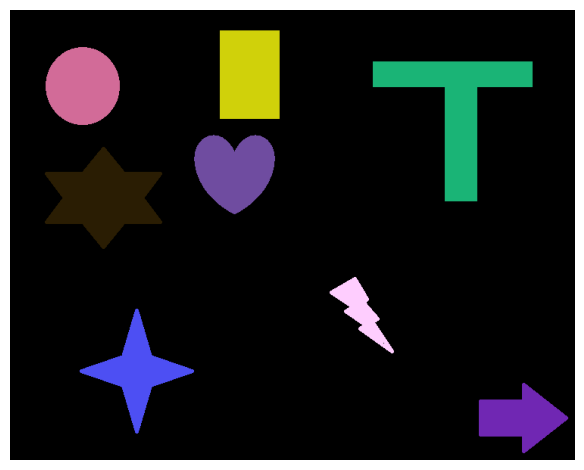

In [19]:
colors = np.random.random((labels,3))*255

segmented_img = np.zeros_like(img)

for i in range(n):
    for j in range(m):
        if new_img2[i,j] != 0:
            segmented_img[i,j] = colors[int(new_img2[i,j])-1]
            


plt.imshow(segmented_img)
plt.grid(False)
plt.axis('off')
plt.rcParams["figure.autolayout"] = True
plt.show()